In [1]:
%matplotlib inline

In [34]:
import pandas as pd
import glob
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

# Testing the degree to which SD sequence strength varies as a function of linear position within the viral genomes

**The hypothesis here is that genes expressed early during infection really need to "hijack" ribosomes. Once the ball is rolling down hill, perhaps other mechanisms kick in to degrade host transcripts for instance.**

In [211]:
first_list = []
second_list = []

for vir_file in glob.glob('../Data/562_rep_viruses/*.tsv')[:]:
    virus_df = pd.read_csv(vir_file, sep='\t', index_col=0)
    n_seq = virus_df.shape[0]
    
    ###Unclear whether I want to limit strange viruses that are tiny or huge 
    ###but this is here just in case
    if n_seq < 20 or n_seq > 200:
        continue
    first_half = virus_df.iloc[:n_seq//2]
    second_half = virus_df.iloc[n_seq//2:]
    first_list.append(first_half['energy_binding'].mean())
    second_list.append(second_half['energy_binding'].mean())
print(len(first_list), len(second_list))

357 357



**The problem, of course, is that the orientation of the viral sequences is unknown. So I have a free parameter here to basically say "find the orientation with the most number of genes going in that direction". It's unclear if this will always/sometimes work but seems reasonable and the results are *fairly* robust.**

In [205]:
first_list = []
second_list = []

orientation_param = 0.7

for vir_file in glob.glob('../Data/562_rep_viruses/*.tsv')[:]:
    virus_df = pd.read_csv(vir_file, sep='\t', index_col=0)
    n_seq = virus_df.shape[0]
    
    ###Unclear whether I want to limit strange viruses that are tiny or huge 
    ###but this is here just in case
    if n_seq < 20 or n_seq > 200:
        continue

    ###Check if there are any negative strand sequences and if so count them up
    if '-' in virus_df['strand'].value_counts():
        neg_counts = virus_df['strand'].value_counts()['-']
    else:
        neg_counts = 0
        
    ###Remove ones whose orientation I'm not confident about
    if neg_counts/n_seq < orientation_param and neg_counts/n_seq > 1-orientation_param:
        continue
    
    ###If there are more negative strand genes, assume that the virus orientation is reversed
    if neg_counts / n_seq >= orientation_param:
        second_half = virus_df.iloc[:n_seq//2]
        first_half = virus_df.iloc[n_seq//2:]
    ###Otherwise proceed as would be intuitive
    else:
        first_half = virus_df.iloc[:n_seq//2]
        second_half = virus_df.iloc[n_seq//2:]
    first_list.append(first_half['energy_binding'].mean())
    second_list.append(second_half['energy_binding'].mean())
print(len(first_list), len(second_list))

215 215


# Visualization and statistics

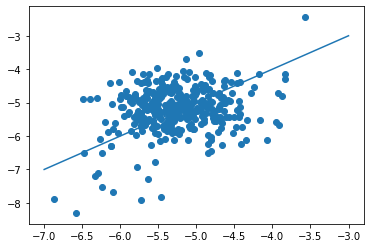

In [213]:
fig, ax = plt.subplots()
ax.scatter(first_list, second_list)
ax.plot([-7, -3], [-7, -3])

WilcoxonResult(statistic=27464.5, pvalue=0.021476666807472206)

-5.261455028740893 -5.196563752316978 -0.0648912764239145


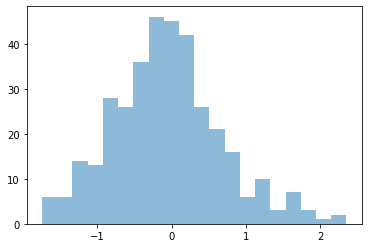

In [214]:
fig, ax = plt.subplots()
ax.hist(np.array(first_list)-np.array(second_list), 20, alpha=0.5)
print(stats.wilcoxon(first_list, second_list))
print()
print(np.mean(first_list), np.mean(second_list), np.mean(np.array(first_list)-np.array(second_list)))